In [51]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# CONFIG
DOMAIN = "MT"
TOP_PAPERS = 60
K_CORE = 2

In [52]:
paper_nodes = pd.read_csv("../outputs/paper_nodes.csv")
citation_edges = pd.read_csv("../outputs/citation_edges.csv")

# Filter domain
domain_papers = paper_nodes[paper_nodes["domain"] == DOMAIN]

top_ids = (
    domain_papers
    .sort_values("cited_by_count", ascending=False)
    .head(TOP_PAPERS)["node_id"]
)

In [53]:
# Filter citation edges
edges = citation_edges[
    citation_edges["source"].isin(top_ids) &
    citation_edges["target"].isin(top_ids)
]

G = nx.DiGraph()
G.add_edges_from(edges[["source", "target"]].values)

# Convert to undirected for k-core filtering
G_core = nx.k_core(G.to_undirected(), k=K_CORE)

print("Nodes:", G_core.number_of_nodes())
print("Edges:", G_core.number_of_edges())

Nodes: 47
Edges: 135


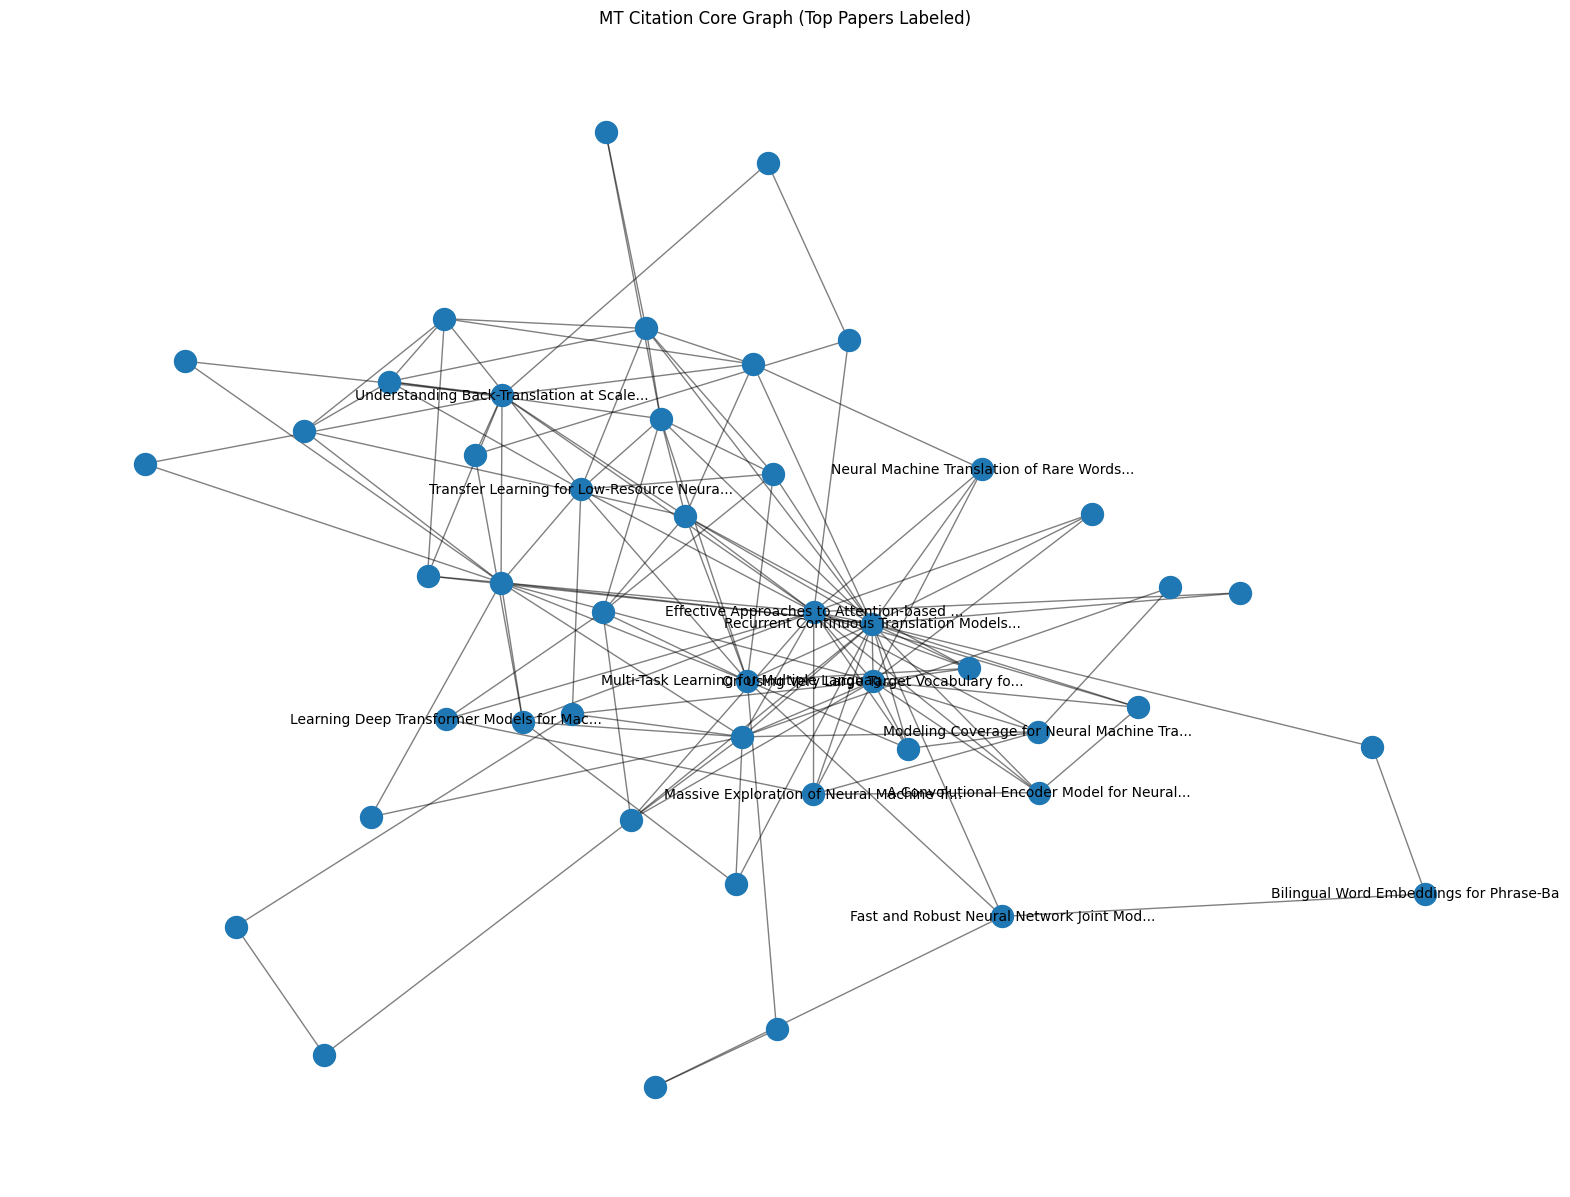

In [55]:
# Map node_id → title
id_to_title = dict(
    zip(paper_nodes["node_id"], paper_nodes["title"])
)

plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G_core, k=0.5)

nx.draw_networkx_nodes(G_core, pos, node_size=250)
nx.draw_networkx_edges(G_core, pos, alpha=0.5)

# Label only top cited nodes
top_label_nodes = (
    domain_papers
    .sort_values("cited_by_count", ascending=False)
    .head(15)["node_id"]
)

labels = {
    node: id_to_title[node][:40] + "..."
    for node in top_label_nodes
    if node in G_core.nodes()
}

nx.draw_networkx_labels(G_core, pos, labels, font_size=10)

plt.title(f"{DOMAIN} Citation Core Graph (Top Papers Labeled)")
plt.axis("off")
plt.show()